In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
datatrain = pd.read_csv('train.csv')
datatest = pd.read_csv('test.csv')

In [2]:
Q1 = datatrain['Age'].quantile(0.25)
Q3 = datatrain['Age'].quantile(0.75)
IQR = Q3 - Q1
a = Q1 - 1.5 * IQR
b = Q3 + 1.5 * IQR
datatrain = datatrain.drop(datatrain[datatrain['Age'] > b].index)
datatrain = datatrain.drop(datatrain[datatrain['Age'] < a].index)
datatrain.to_csv('train1.csv', index=False)

In [3]:
mean = datatrain['Age'].mean()
standard_deviation = datatrain['Age'].std()
Z_score = (datatrain['Age'] - mean) / standard_deviation
cond = abs(Z_score) > 3
datatrain = datatrain.drop(datatrain[cond].index)
datatrain.to_csv('train2.csv', index=False)


Accuracy: 0.8229665071770335
Loss: 6.380933853575763


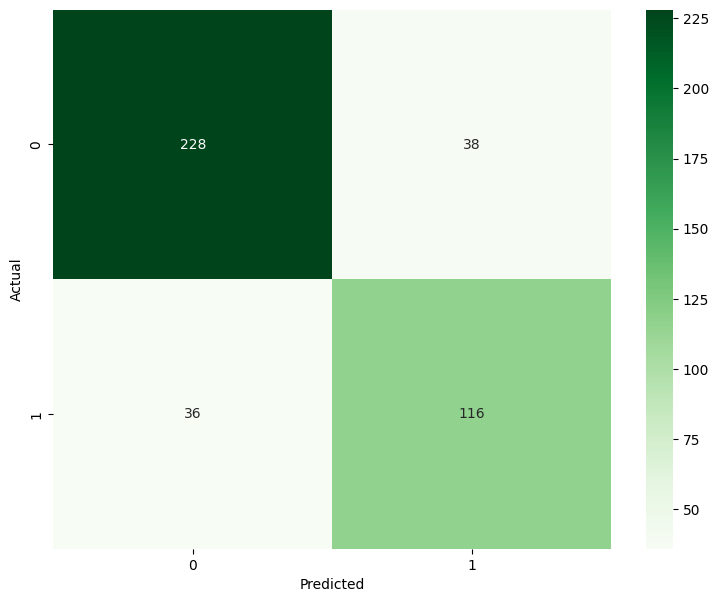

In [6]:
numeric_columns = datatrain.select_dtypes(include=['number']).columns
datatrain[numeric_columns] = datatrain[numeric_columns].fillna(datatrain[numeric_columns].mean())
nonnumeric_columns = datatrain.select_dtypes(include=['object']).columns
most_frequent_values = datatrain[nonnumeric_columns].mode().iloc[0]
datatrain[nonnumeric_columns] = datatrain[nonnumeric_columns].fillna(most_frequent_values)
datatrain_numeric = pd.get_dummies(datatrain)
datatrain_normalized = datatrain_numeric / datatrain_numeric.max()
model =  DecisionTreeRegressor()
x_train = datatrain_normalized.drop("Survived", axis=1)
y_train = datatrain_normalized["Survived"]
 
numeric_columns_test = datatest.select_dtypes(include=['number']).columns
datatest[numeric_columns_test] = datatest[numeric_columns_test].fillna(datatest[numeric_columns_test].mean())
nonnumeric_columns_test = datatest.select_dtypes(include=['object']).columns
most_frequent_values_test = datatest[nonnumeric_columns_test].mode().iloc[0]
datatest[nonnumeric_columns_test] = datatest[nonnumeric_columns_test].fillna(most_frequent_values_test)
datatest_numeric = pd.get_dummies(datatest)
datatest_normalized = datatest_numeric / datatest_numeric.max()
x_test = datatest_normalized
common_columns = x_test.columns.intersection(x_train.columns)
x_test = x_test[common_columns]
x_train = x_train[common_columns]
y_test = pd.read_csv('gender_submission.csv')
y_test = y_test.drop(y_test.columns[0], axis=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
loss = log_loss(y_test, y_pred)
print("Loss:", loss)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()